In [107]:
import hvplot.pandas
import pandas as pd
import requests
import matplotlib.pyplot as plt

import time
from scipy.stats import linregress

In [108]:
# Load the CSV file created in Part 1 into a Pandas DataFrame
movies_df = pd.read_csv("data/IMDB Movies-inflation-Mar222023.csv").dropna()

# Display sample data
movies_df.head()

,IMDB_ID,original_title,year,date_published,genre 1 kaggle,genre 2 kaggle,genre 3 kaggle,duration,country,language_1,...,desc35,avg_vote,votes,Budget - Inflation Adjusted,budget,usa_gross_income_adjusted,usa_gross_income,WW Gross Income - Inflation Adjusted,worlwide_gross_income,reviews_from_users
5,tt0120679,Frida,2002,17/01/2003,Biography,Drama,Romance,123,"Mexico, USA, Canada",English,...,"A biography of artist Frida Kahlo,",7.4,79690,"$17,263,657.59","$12,000,000.00","$37,239,148.05","$25,885,000.00","$80,993,131.49","$56,298,474.00",297.0
29,tt0132245,Driven,2001,27/04/2001,Action,Drama,Sport,116,"USA, Canada, Australia",English,...,A young hot shot driver is in,4.6,38891,"$137,370,039.53","$94,000,000.00","$47,816,559.81","$32,720,065.00","$80,003,051.31","$54,744,738.00",347.0
38,tt0139654,Training Day,2001,16/11/2001,Crime,Drama,Thriller,122,USA,English,...,A rookie cop spends his first,7.7,381509,"$65,762,252.96","$45,000,000.00","$111,988,596.74","$76,631,907.00","$153,264,385.88","$104,876,233.00",712.0
40,tt0144084,American Psycho,2000,25/05/2001,Comedy,Crime,Drama,101,"USA, Canada",English,...,A wealthy New York City investment,7.6,473137,"$10,520,772.36","$7,000,000.00","$22,650,148.26","$15,070,285.00","$51,501,531.33","$34,266,564.00",1267.0
42,tt0144964,Highlander: Endgame,2000,1/9/00,Action,Adventure,Fantasy,87,"UK, USA, Luxembourg",English,...,Immortals Connor and Duncan MacLeod,4.6,19127,"$37,574,186.99","$25,000,000.00","$19,255,805.93","$12,811,858.00","$23,812,427.58","$15,843,608.00",361.0


## Average rating of all movies for each year

Text(0, 0.5, 'Average Vote')

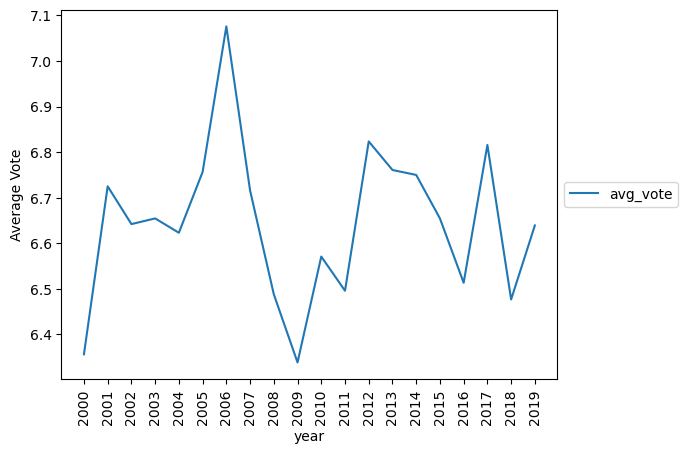

In [109]:
#groupby year to get the average of desired column

avg_vote = movies_df.groupby("year")["avg_vote"].mean()

#turn function into a DataFrame

avg_vote_df = pd.DataFrame(avg_vote)

#plot using matplotlib

lines = avg_vote_df.plot.line()
lines.set_xticks(avg_vote_df.index);
lines.set_xticklabels(avg_vote_df.index, rotation=90)
lines.legend(loc='center left',bbox_to_anchor=(1.0, 0.5));
lines.legend(loc='center left',bbox_to_anchor=(1.0, 0.5));
lines.set_ylabel('Average Vote')

## Average profit of each movie by year

Text(0, 0.5, 'Inflation Adjusted Avg Profit')

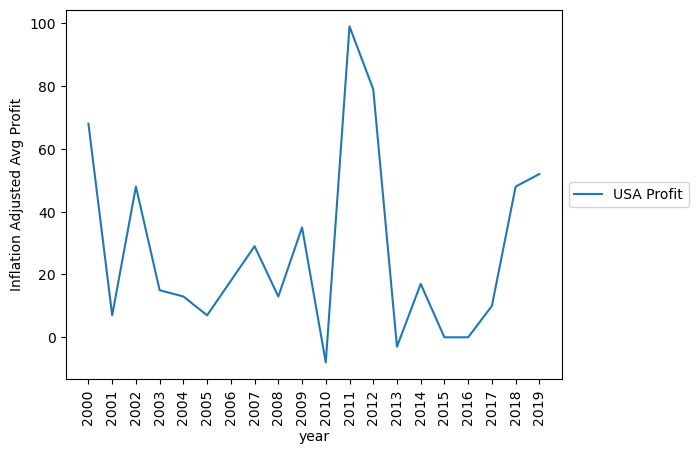

In [110]:
#groupby year to get the average of desired column

#USA Gross Income - Inflation Adjusted 
#Budget - Inflation Adjusted

movies_df["USA Gross Income - Inflation Adjusted"] = movies_df[" usa_gross_income_adjusted"].str.extract('(\d+)', expand=False).astype('int64')
movies_df["Budget - Inflation Adjusted"] = movies_df["Budget - Inflation Adjusted"].str.extract('(\d+)', expand=False).astype('int64')
movies_df["USA Profit"] = movies_df["USA Gross Income - Inflation Adjusted"] - movies_df["Budget - Inflation Adjusted"]

avg_profit = movies_df.groupby("year")["USA Profit"].mean()

#turn function into a DataFrame

avg_profit_df = pd.DataFrame(avg_profit)

avg_profit_df = avg_profit_df["USA Profit"].astype('int64')

#plot using matplotlib

lines = avg_profit_df.plot.line()
lines.set_xticks(avg_profit_df.index);
lines.set_xticklabels(avg_profit_df.index, rotation=90)
lines.legend(loc='center left',bbox_to_anchor=(1.0, 0.5));
lines.legend(loc='center left',bbox_to_anchor=(1.0, 0.5));
lines.set_ylabel('Inflation Adjusted Avg Profit')

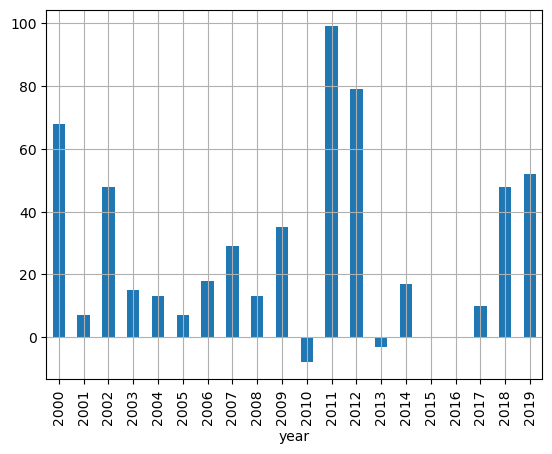

In [111]:
avg_profit_df.plot(kind="bar", x="year", y="USA Profit", grid=True)

plt.show()

## Average Budget of all movies in year

Text(0, 0.5, 'Inflation Adjusted Budget')

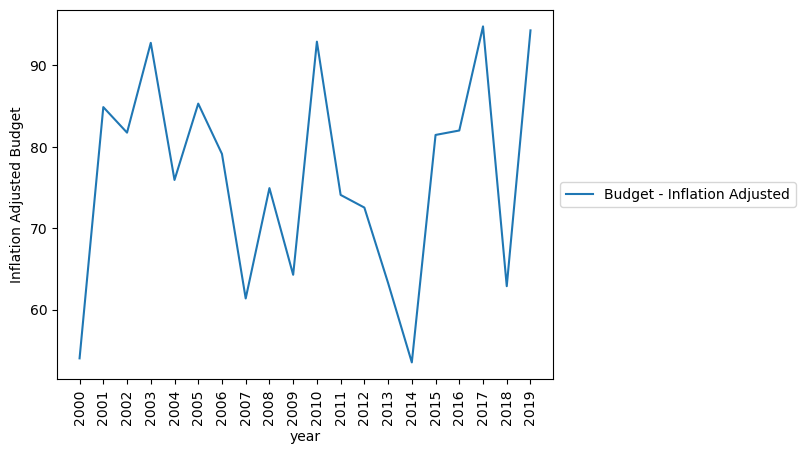

In [112]:
#groupby year to get the average of desired column

avg_budget = movies_df.groupby("year")["Budget - Inflation Adjusted"].mean()

#turn function into a DataFrame

avg_budget_df = pd.DataFrame(avg_budget)

#plot using matplotlib

lines = avg_budget_df.plot.line()
lines.set_xticks(avg_budget.index);
lines.set_xticklabels(avg_budget.index, rotation=90)
lines.legend(loc='center left',bbox_to_anchor=(1.0, 0.5));
lines.legend(loc='center left',bbox_to_anchor=(1.0, 0.5));
lines.set_ylabel('Inflation Adjusted Budget')

## Total Profit

Text(0, 0.5, 'Inflation Adjusted Total Profit')

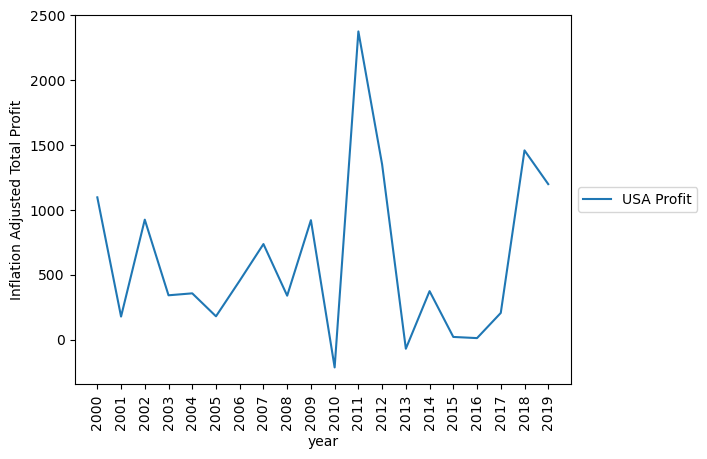

In [113]:
Total_profit = movies_df.groupby("year")["USA Profit"].sum()

#turn function into a DataFrame

Total_profit_df = pd.DataFrame(Total_profit)

#plot using matplotlib

lines = Total_profit_df.plot.line()
lines.set_xticks(Total_profit_df.index);
lines.set_xticklabels(Total_profit_df.index, rotation=90)
lines.legend(loc='center left',bbox_to_anchor=(1.0, 0.5));
lines.legend(loc='center left',bbox_to_anchor=(1.0, 0.5));
lines.set_ylabel('Inflation Adjusted Total Profit')

## Total Budget

Text(0, 0.5, 'Inflation Adjusted Total Budget')

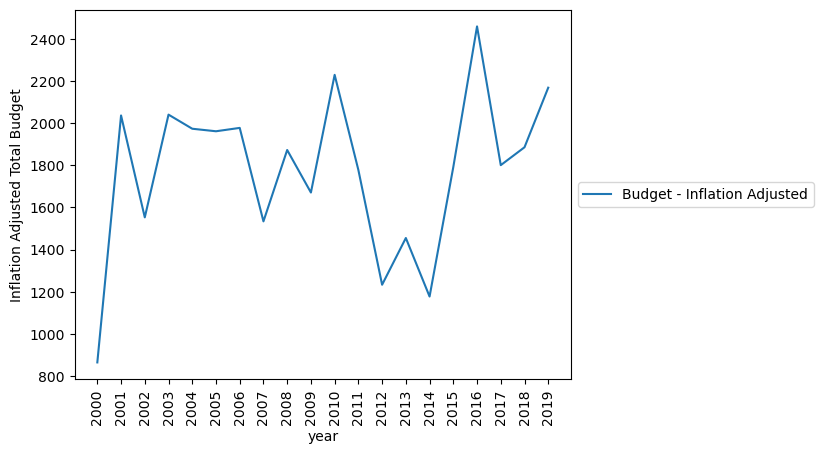

In [114]:
total_budget = movies_df.groupby("year")["Budget - Inflation Adjusted"].sum()

#turn function into a DataFrame

total_budget_df = pd.DataFrame(total_budget)

#plot using matplotlib

lines = total_budget_df.plot.line()
lines.set_xticks(total_budget_df.index);
lines.set_xticklabels(total_budget_df.index, rotation=90)
lines.legend(loc='center left',bbox_to_anchor=(1.0, 0.5));
lines.legend(loc='center left',bbox_to_anchor=(1.0, 0.5));
lines.set_ylabel('Inflation Adjusted Total Budget')

R squared: 0.04852536827761772


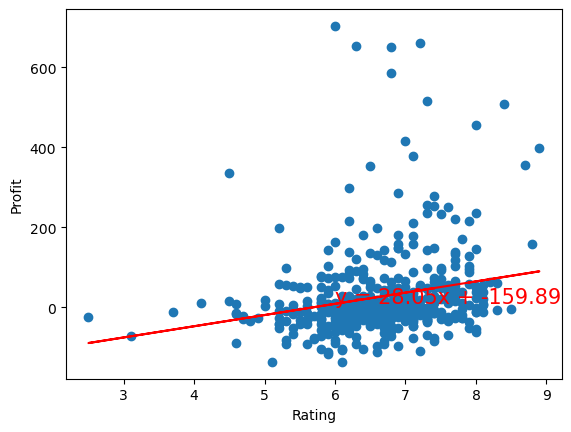

In [115]:
 ## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = movies_df["avg_vote"].astype("float")
y_values = movies_df["USA Profit"].astype("float")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Rating')
plt.ylabel('Profit')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

R squared: 0.0005029266692924159


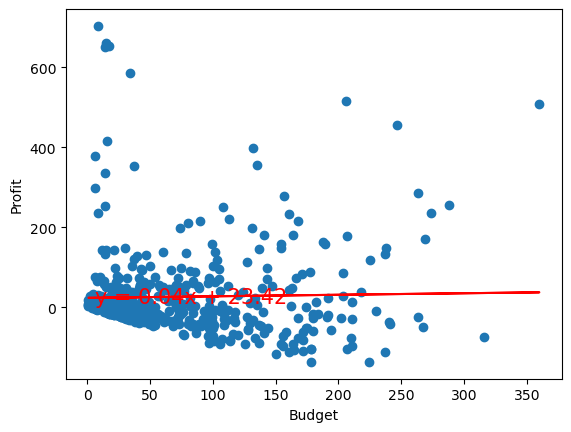

In [116]:
 ## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = movies_df["Budget - Inflation Adjusted"].astype("float")
y_values = movies_df["USA Profit"].astype("float")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Budget')
plt.ylabel('Profit')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()